In [1]:

import _init_
from constants import *
from set_path import *
from config import *
from functions import *

# Get temperature

In [2]:
file = '/g/data/jh2/av5889/quokka_myrepo/quokka/extern/grackle_data_files/input/CloudyData_UVB=HM2012.h5'
# file = '/g/data/jh2/av5889/quokka_myrepo/quokka/extern/grackle_data_files/input/CloudyData_UVB=FG2011.h5'
#Dim2 is redshift. Dim1 is density. Dim3 is temperature
grackle = h5py.File(file)
array = grackle['CoolingRates/Primordial/MMW'][()]
#density(1.e-6, 1.e4), redshift(0,15), temperature(10., 1.e9)
table = array[:,0,:]
table_nH   = np.logspace(-10, 4, array.shape[0])
table_temp = np.logspace(1,  9, array.shape[2])

prim_heating = grackle['CoolingRates/Primordial/Heating'][()][:,0,:]
prim_cooling = grackle['CoolingRates/Primordial/Cooling'][()][:,0,:]

met_heating  = grackle['CoolingRates/Metals/Heating'][()][:,0,:]
met_cooling  = grackle['CoolingRates/Metals/Cooling'][()][:,0,:]

netLambda_heat = prim_heating + 0.2*met_heating
netLambda_cooling  = prim_cooling + 0.2*met_cooling
netLambda = netLambda_heat - netLambda_cooling

In [3]:
npath = '/g/data/jh2/av5889/quokka_myrepo/Analysis/notebooks/DatFile/'
output = ['metalcooling.dat' , 'primcooling.dat',\
           'metalheating.dat',  'primheating.dat']

out_met_cooling = np.zeros(netLambda.shape)
out_prim_cooling = np.zeros(netLambda.shape)
out_met_heating = np.zeros(netLambda.shape)
out_prim_heating = np.zeros(netLambda.shape)
arrays = [out_met_cooling, out_prim_cooling, out_met_heating, out_prim_heating]
i=j=0
for out,arr in zip(output,arrays):
    output = os.path.join(npath, out)
    with open(output, 'r') as file:
        for line in file:
            lamda = float(line.split('=')[1].split(',')[0])
            indx_i = int(line.split('=')[1].split(',')[1])
            indx_j = int(line.split('=')[1].split(',')[2])
            arr[indx_i, indx_j] = 10.**lamda*1.67e-24**2

In [4]:
out_net_lambda = (out_prim_heating + out_met_heating) - (out_prim_cooling + out_met_cooling)
diff = (netLambda - out_net_lambda)/netLambda
np.where(diff==np.amax(diff)), np.amax(diff)

((array([22]), array([48])), 635.0249546432507)

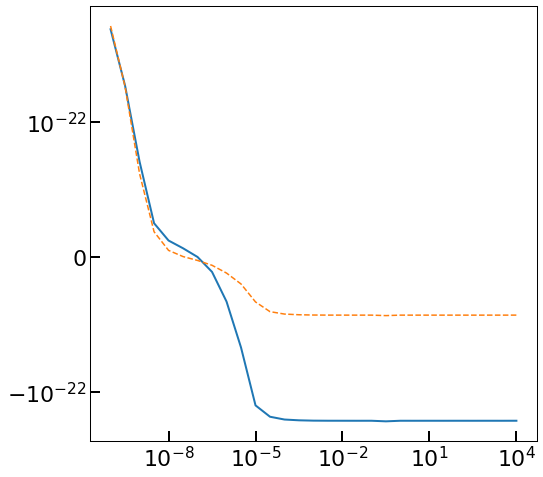

In [5]:
fig, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.02, 'hspace':0.02},figsize=(8, 8))

ax.plot(table_nH, out_net_lambda[:,94], label='Out', lw=2.)
ax.plot(table_nH, netLambda[:,94], ls='--', label='Grackle')

ax.set_yscale('Symlog', linthresh=1.e-22)
ax.set_xscale('log')

In [6]:
# rho, log_nH, T, Edot, netLambda=1.67e-28, -4.15e+00, 1.02e+05, -1.88e-30, -1.31e+26 
nH = 1.67e-28 * cloudy_H_mass_fraction/hydrogen_mass_cgs
Lambda(1.02e+05, nH), nH, -1.31e+26*hydrogen_mass_cgs*hydrogen_mass_cgs

NameError: name 'cloudy_H_mass_fraction' is not defined

In [7]:
table_nH[5:7], table_temp[80:82]/1.e5, netLambda[5,80]

(array([3.16227766e-08, 1.00000000e-07]),
 array([1.        , 1.12201845]),
 2.0036743499999968e-23)

In [8]:
# logPrimCool, logPrimHeat, logMetalCool, logMetalHeat=2.51e+01, 2.35e+01, 2.61e+01, 2.35e+01 
# netLambda_prim , netLambda_metals=-1.25e+25, -1.19e+26 

np.log10(prim_cooling[5,80]/hydrogen_mass_cgs/hydrogen_mass_cgs),\
np.log10(prim_heating[5,80]/hydrogen_mass_cgs/hydrogen_mass_cgs),\
np.log10(met_cooling[5,80]/hydrogen_mass_cgs/hydrogen_mass_cgs),\
np.log10(met_heating[5,80]/hydrogen_mass_cgs/hydrogen_mass_cgs)

(24.000088908446582, 24.36126089151924, 23.332951678659775, 24.785500075259442)

In [9]:
np.log10(out_prim_cooling[5,80]/hydrogen_mass_cgs/hydrogen_mass_cgs),\
np.log10(out_prim_cooling[5,81]/hydrogen_mass_cgs/hydrogen_mass_cgs),\
np.log10(out_prim_cooling[6,80]/hydrogen_mass_cgs/hydrogen_mass_cgs),\
np.log10(out_prim_cooling[6,81]/hydrogen_mass_cgs/hydrogen_mass_cgs)
# np.log10(out_prim_heating[5,80]/hydrogen_mass_cgs/hydrogen_mass_cgs),\
# np.log10(out_met_cooling[5,80]/hydrogen_mass_cgs/hydrogen_mass_cgs),\
# np.log10(out_met_heating[5,80]/hydrogen_mass_cgs/hydrogen_mass_cgs)

(23.9785, 24.0042, 23.9485, 23.9726)

In [10]:
# ix, iy, iix, iiy=11, 0, 12, 1
# ix, xv.bx, xi, d  =-4.15e+00, -1.00e+01, 5.00e-01, 8.77e+164
np.log10(table_nH[11:13]), np.log10(nH), np.log10(table_nH[5:7])

NameError: name 'nH' is not defined

In [11]:
# dx = (xf - xi) / static_cast<double>(xv.end - xv.begin - 1);
# xi, xf, (xv.end - xv.begin - 1)  =-1.00e+01, 4.00e+00, 28
dx = (np.log10(table_nH[-1])- np.log10(table_nH[0]))/(28)
dx, np.log10(table_nH[-1]), np.log10(table_nH[0]), 10.**-1.00e+01

(0.5, 4.0, -10.0, 1e-10)

In [12]:
np.log10(out_prim_heating[5,80]/hydrogen_mass_cgs/hydrogen_mass_cgs),\
np.log10(out_prim_heating[5,81]/hydrogen_mass_cgs/hydrogen_mass_cgs),\
np.log10(out_prim_heating[6,80]/hydrogen_mass_cgs/hydrogen_mass_cgs),\
np.log10(out_prim_heating[6,81]/hydrogen_mass_cgs/hydrogen_mass_cgs)

(24.3535, 24.336, 24.0969, 24.0769)

/jobfs/111300050.gadi-pbs/ipykernel_1578125/4158750917.py:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plot = ax.pcolormesh(table_nH, table_temp, np.transpose(netLambda),\


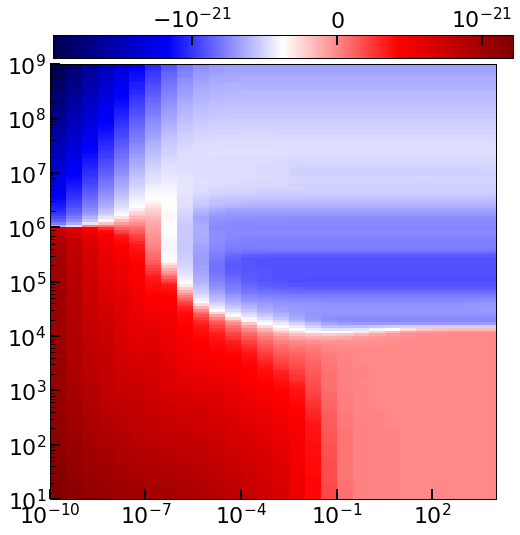

In [13]:
fig, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.02, 'hspace':0.02},figsize=(8, 8))
i=0

cbarx = 0.13
cbheight = 0.04
cbary = 0.89
cblen = 0.8
dx1 = 0.25
cbtitlex = 0.1
cbtitley = 16.5

plot = ax.pcolormesh(table_nH, table_temp, np.transpose(netLambda),\
                    norm=mcolors.SymLogNorm(linthresh=8.e-24),
                    cmap='seismic')
cax = fig.add_axes([cbarx, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(-1.e-21, 0.0, 1.e-21))
cax.xaxis.set_ticks_position('top')
ax.set_yscale('log')
ax.set_xscale('log')

In [6]:

from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Example arrays of x values and corresponding f(x) values


# Define a function that returns f(x) for a given x
def f(T,netLambda):
    x_values = table_temp
    interp_func = interp1d(x_values, netLambda, kind='linear')
    return interp_func(T)

i=0
teq = np.zeros(table_nH.shape[0])
teq_prev = 10.
guess = np.logspace(1,  9, array.shape[0])
for i in range(netLambda.shape[0]):
    teq[i] = fsolve(f, table_temp[i], args=(np.abs(netLambda[i])))

/apps/python3/3.9.2/lib/python3.9/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/apps/python3/3.9.2/lib/python3.9/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [7]:
interp_teq = interp1d(table_nH, teq, kind='linear')
interp_teq(7.157683773530885e-05) , np.log10(2.18e+04)

(array(20964.54311625), 4.338456493604605)

In [8]:
# 1.67e-26, 2.64e-14, 8.78e+03
# 1.67e-24, 7.84e-13, 4.13e+03
# 1.67e-28, 4.65e-16, 1.39e+04
rho_sim = np.asarray([1.67e-28, 1.67e-26, 1.67e-24])
cloudy_H_mass_fraction = 1. / (1. + 0.1 * 3.971) 
nH_sim = rho_sim*cloudy_H_mass_fraction/mp
temp_sim = np.asarray([2.01e+04, 8.78e+03,4.13e+03])

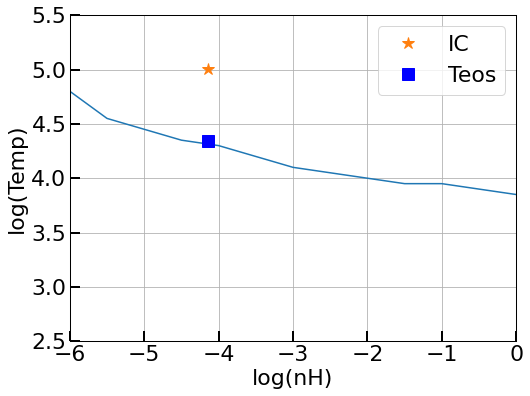

In [9]:
fig, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.02, 'hspace':0.02},figsize=(8, 6))
ax.plot(np.log10(table_nH), np.log10(teq))
ax.plot(np.log10(7.157683773530885e-05), np.log10(1.02e5), '*', markersize=12, label='IC')
# rho, eint_old, Temp=1.67e-28, 6.71e-16, 2.01e+04
# ax.plot(np.log10(7.157683773530885e-05), np.log10(13944.22473323), 's', color='red', markersize=12, label='FiTenal')
t_eos = 2.18e+04 
ax.plot(np.log10(7.157683773530885e-05), np.log10(t_eos), 's', color='blue', markersize=12, label='Teos')
ax.set_xlim(-6, 0.)
ax.set_ylim(2.5, 5.5)
ax.grid()
ax.set_ylabel('log(Temp)')
ax.set_xlabel('log(nH)')
ax.legend()

In [19]:
Lambda = interpolate.interp2d(table_temp, table_nH, netLambda,\
                              kind='linear', copy=True, bounds_error=False, fill_value=None)

In [25]:
Lambda(1.e4, 1.)

array([-2.13019661e-24])

In [20]:
# rho, eint_old, Temp=1.67e-28, 7.31e-16, 2.18e+04
rho_sim = 1.67e-28
cloudy_H_mass_fraction = 1. / (1. + 0.1 * 3.971)
nH_sim = rho_sim * cloudy_H_mass_fraction/hydrogen_mass_cgs
temp_sim = 1.02e5
Eint_sim = 3.42e-15
Edot_sim = Lambda(temp_sim, nH_sim) * nH_sim**2
tcool = Eint_sim/Edot_sim/Myr
tcool

array([-59.88972172])

In [21]:
cloudy_H_mass_fraction = 1. / (1. + 0.1 * 3.971)
rho = 1.4626019243256987e-29
nH = rho*cloudy_H_mass_fraction/mp
Edot  = nH * nH * Lambda(512134.8715954416, nH)
Edot *2.201030342e+11

array([-8.54772901e-22])

In [22]:
np.log10(3.64e+05), np.log10(rho_sim/hydrogen_mass_cgs)

(5.561101383649056, -4.0)

In [23]:
# The dEint in i=32, j=32, k=32 is = -2.76e-21
# rho, eint_old, Temp=1.46e-29, 1.08e-15, 3.64e+05
cloudy_H_mass_fraction = 1. / (1. + 0.1 * 3.971)
rho_sim = 1.46e-29
eint_sim = 1.08e-15
temp_sim = 3.64e+05
tstep = 1.304538364e+12
tcool = 1.5 * nH_sim * 1.38e-16 * temp_sim/Edot/Myr
dEint = 2. * 2.76e-21
Edot = dEint/tstep
nH_sim = rho_sim*cloudy_H_mass_fraction/mp
lambda_sim = Edot/nH_sim/nH_sim
lambda_sim , Edot, tcool, nH_sim


(1.080598694097214e-22,
 4.2313818836837214e-33,
 array([-44086.83959921]),
 6.257615754104846e-06)

In [24]:
# The dEint for high temp cell = -7.79e-12
# The dEint for high temp cell = -6.14e-12
# rho, eint_old, Temp=4.08e-24, 9.54e-09, 1.16e+07
# rho, eint_old, Temp=3.69e-24, 9.54e-09, 1.28e+07


rho_sim = 3.69e-24
eint_sim = 9.54e-09
temp_sim = 1.28e+07
tstep = 2.201030342e+11
dEint = 2. * 7.79e-12
Edot = dEint/tstep
tcool = 1.5 * nH_sim * 1.38e-16 * temp_sim/Edot/Myr
nH_sim = rho_sim*cloudy_H_mass_fraction/mp
lambda_sim = Edot/nH_sim/nH_sim
lambda_sim , Edot, tcool, nH_sim


(2.8299360339136764e-23,
 7.07850305500241e-23,
 7.4359631597391645e-06,
 1.5815480912771838)

In [29]:
temp = 1.e4
nH = 1.
tcool = 1.5 * 1.38e-16 * temp/nH/Lambda(6.71e+03, 4.19e-24/mp)
tcool/Myr

array([-0.21913111])

In [30]:
Lambda(6.71e+03, 4.19e-24/mp)

array([-2.99885697e-25])